# CCS Bistable Spring Pair

Drop-in replacement for the linear folded spring (`make_spring_pair()`), using
CCS (Centrally-Clamped Stepped) bistable beams from Ma et al. for nonvolatile
switching.

## Design overview

Four CCS half-beams connect two outer multi-layer anchors to a central shuttle
gap. The as-fabricated offset combined with residual stress produces two stable
states — no drive voltage needed to hold position.

## Key parameters (POLY_MEMS, 500 nm structural layer)

| Parameter | Value | Rationale |
|-----------|-------|----------|
| Flex width | 0.8 um | M.07 spring_beam_min_width |
| Rigid width | 1.5 um | Structural integrity |
| Initial offset | 1.2 um | Q = h/t = 1.2/0.5 = 2.4 > 2.31 (bistability) |
| Taper length | 2.0 um | Scaled for wider beams |
| Anchors | 3-layer | POLY_TOP + POLY_MEMS frame + SI_FULL |

In [1]:
import sys
sys.path.insert(0, "../../libraries")

from mcw_custom_optical_mems_pdk import PDK
PDK.activate()

from ccs_bistable_beam import make_ccs_half_beam, make_ccs_beam, make_ccs_beam_set
from bistable_spring_pair import make_bistable_spring_pair

## CCS Half-Beam (building block)

One half of a CCS beam: anchor end at (0, 0) rising to shuttle end at
(half_span, initial_offset). Contains a cosine flex section and a
straight rigid section with a smooth taper between them.

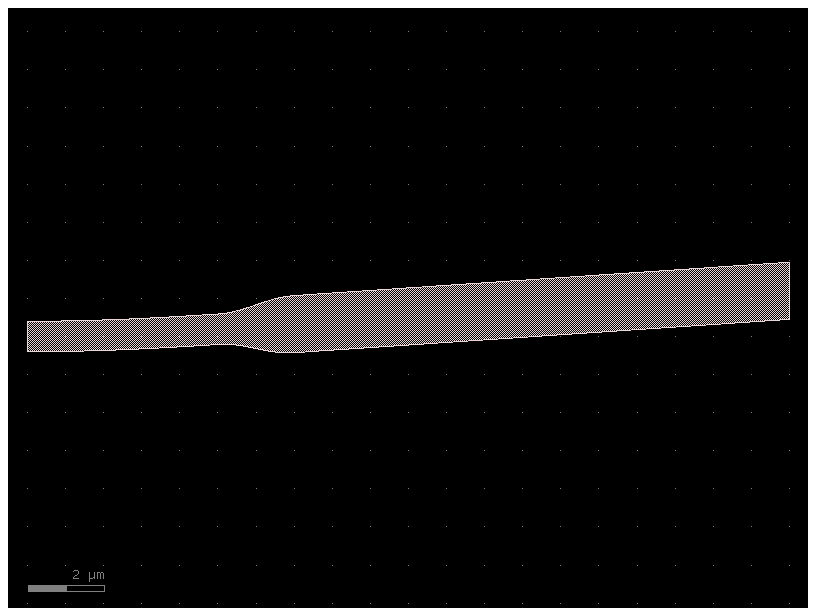

In [2]:
half_beam = make_ccs_half_beam(
    half_span=20.0,
    flex_ratio=0.3,
    flex_width=0.8,
    rigid_width=1.5,
    initial_offset=1.2,
    taper_length=2.0,
)
half_beam.plot()

## Full CCS Beam (POLY_MEMS defaults)

Symmetric beam from left anchor to right anchor, scaled for the 500 nm
POLY_MEMS structural layer.

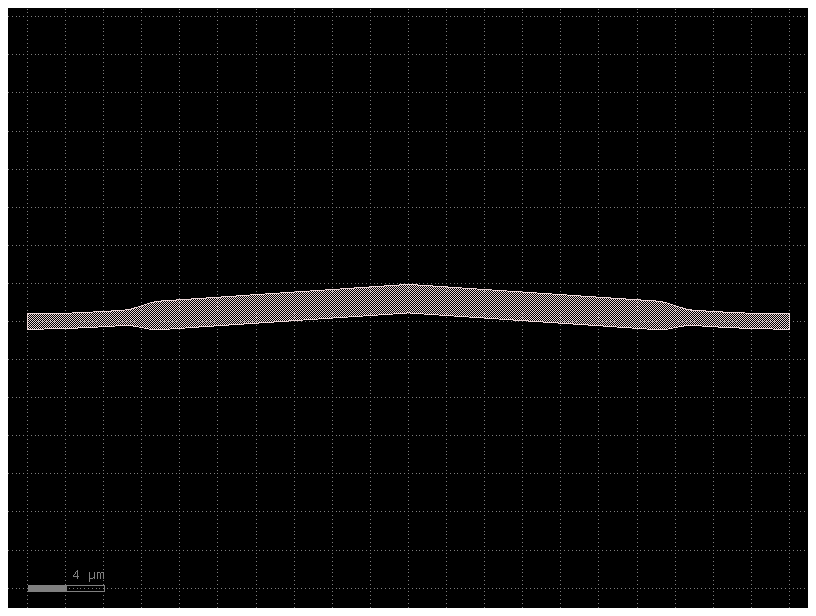

In [3]:
beam = make_ccs_beam(
    span=40.0,
    flex_ratio=0.3,
    flex_width=0.8,
    rigid_width=1.5,
    initial_offset=1.2,
    taper_length=2.0,
)
beam.plot()

## CCS Beam Set (parallel pair with anchors and rod)

Two parallel CCS beams connected by a central rod, with anchor pads at
both ends. This is the basic bistable spring unit.

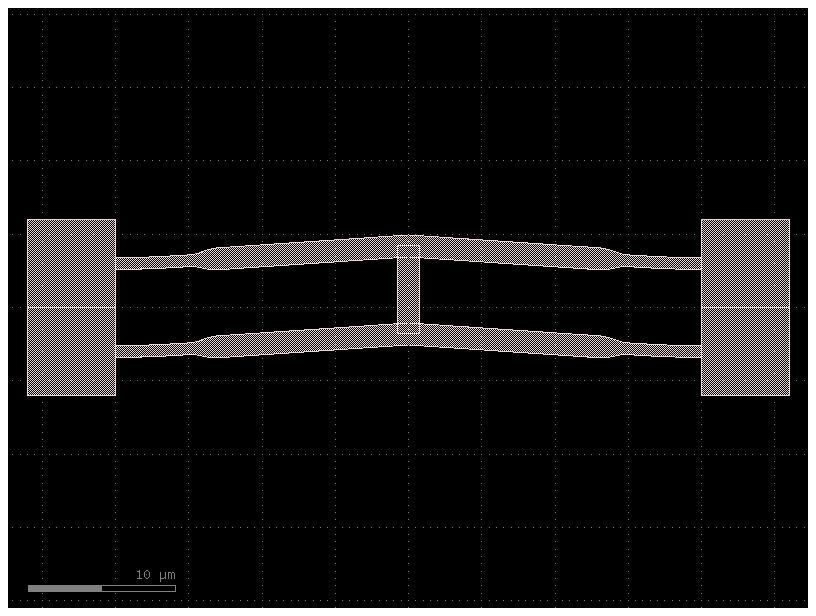

In [4]:
beam_set = make_ccs_beam_set(
    span=40.0,
    flex_ratio=0.3,
    flex_width=0.8,
    rigid_width=1.5,
    initial_offset=1.2,
    taper_length=2.0,
    beam_spacing=6.0,
    rod_width=1.5,
    anchor_width=6.0,
    anchor_length=6.0,
)
beam_set.plot()

## Beam Centerline and Width Profiles

Visualize the CCS profile shape and width variation for the POLY_MEMS
scaled parameters.

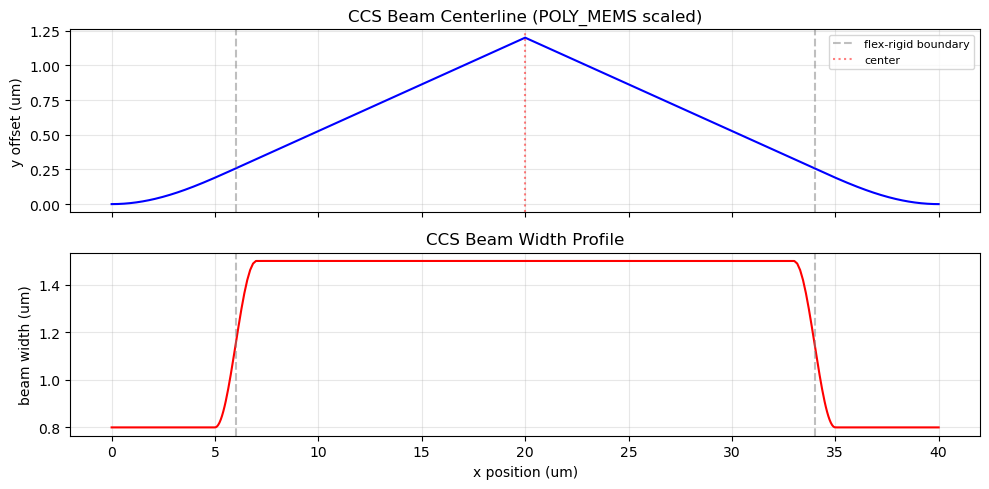

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ccs_bistable_beam import _compute_ccs_centerline, _compute_width_profile

span, flex_ratio, h = 40.0, 0.3, 1.2
x, y = _compute_ccs_centerline(span, flex_ratio, h)
w = _compute_width_profile(x, span, flex_ratio, 0.8, 1.5, 2.0)

L_flex = flex_ratio * span / 2  # = 6 um per side

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.plot(x, y, 'b-', linewidth=1.5)
ax1.axvline(L_flex, color='gray', linestyle='--', alpha=0.5, label='flex-rigid boundary')
ax1.axvline(span - L_flex, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(span / 2, color='r', linestyle=':', alpha=0.5, label='center')
ax1.set_ylabel('y offset (um)')
ax1.set_title('CCS Beam Centerline (POLY_MEMS scaled)')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

ax2.plot(x, w, 'r-', linewidth=1.5)
ax2.axvline(L_flex, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(span - L_flex, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('x position (um)')
ax2.set_ylabel('beam width (um)')
ax2.set_title('CCS Beam Width Profile')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Bistable Spring Pair (drop-in replacement for folded spring)

Four CCS half-beams connecting two multi-layer anchors to a central
shuttle gap (`anchor_gap_length` matches proof mass width). This is
the direct replacement for `make_spring_pair()`.

Spring pair size: 96.0 x 9.0 um


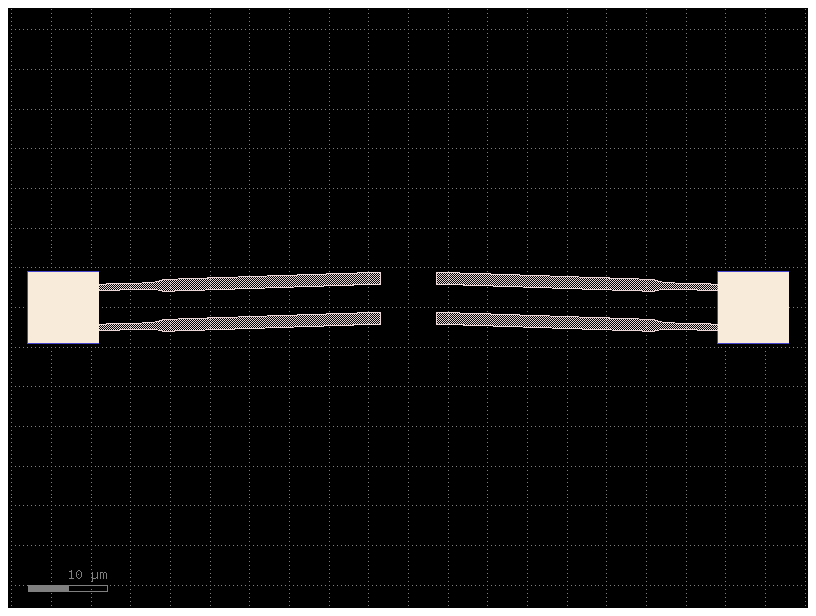

In [6]:
sp = make_bistable_spring_pair(
    span=40.0,
    flex_ratio=0.3,
    flex_width=0.8,
    rigid_width=1.5,
    initial_offset=1.2,
    taper_length=2.0,
    beam_spacing=5.0,
    anchor_gap_length=7.0,
    anchor_length=8.0,
    anchor_width=8.0,
)
bb = sp.dbbox()
print(f"Spring pair size: {bb.width():.1f} x {bb.height():.1f} um")
sp.plot()

## GDS Export

In [7]:
sp.write_gds("bistable_spring_pair.gds")
print("Exported to bistable_spring_pair.gds")

Exported to bistable_spring_pair.gds
